# Evaluate the Test Predictions

In [1]:
import os
os.chdir('..')
os.getcwd()

'/Users/aaronquinton/Documents/UBC-MDS/Capstone/BCstats/DSCI_591_capstone-BCStats'

In [2]:
import pickle
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from src.models.evaluate_results import theme_results, plot_theme_ROC, plot_average_ROC_by_embed

In [3]:
df_test = pd.read_csv('./data/interim/test_2018-qualitative-data.csv')
Y_test = np.array(df_test.loc[:, "CPD":"OTH"])

In [4]:
Y_test

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [5]:
with open('./data/output/test_predictions.pickle', 'rb') as handle:
          Y_pred = pickle.load(handle)

In [6]:
Y_pred

{'BOW': <1475x12 sparse matrix of type '<class 'numpy.int64'>'
 	with 1845 stored elements in Compressed Sparse Column format>,
 'conv1d': {'base': array([[4.9608346e-04, 9.9854040e-01, 2.6587951e-03, ..., 6.2639071e-03,
          1.5739874e-04, 5.8343490e-03],
         [2.6309744e-03, 9.9979132e-01, 4.4324943e-03, ..., 1.7524460e-02,
          1.1952051e-02, 3.1677508e-03],
         [8.7521923e-01, 6.8301364e-04, 1.0225745e-02, ..., 3.6503999e-03,
          2.4984118e-02, 3.9104730e-02],
         ...,
         [9.7585283e-03, 9.8798698e-01, 4.1529788e-03, ..., 7.0408387e-03,
          2.9297085e-03, 1.2072811e-02],
         [3.9178152e-02, 1.4366777e-02, 2.4891211e-02, ..., 1.2416825e-02,
          7.8780897e-04, 7.2626849e-03],
         [8.9242077e-03, 4.2330471e-04, 7.4024729e-02, ..., 6.7664008e-04,
          9.7933389e-02, 6.5743968e-02]], dtype=float32),
  'glove_crawl': array([[2.1240402e-03, 9.8735863e-01, 1.7470480e-03, ..., 4.3406695e-04,
          8.8441162e-04, 1.4726529e-0

## Bag of Words

In [7]:
Y_pred['BOW'].toarray()

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [8]:
df_overall, df_theme = theme_results(Y_test,Y_pred['BOW'].toarray())

In [9]:
df_overall

,Metric,Value
0,Overall Accuracy,0.4502
1,Hamming Loss,0.0711
2,Micro-average Precision,0.7442
3,Micro-average Recall,0.6356


In [10]:
df_theme

,Label,Y_count,Pred_count,Error,Dummy_Diff,Accuarcy,Precision,Recall
0,CPD,184,156,0.070508,0.054237,0.929492,0.756410,0.641304
1,CB,293,265,0.043390,0.155254,0.956610,0.932075,0.843003
2,EWC,141,99,0.070508,0.025085,0.929492,0.686869,0.482270
3,Exec,149,125,0.080000,0.021017,0.920000,0.624000,0.523490
4,FWE,91,86,0.026441,0.035254,0.973559,0.802326,0.758242
5,SP,145,142,0.069831,0.028475,0.930169,0.647887,0.634483
6,RE,124,90,0.081356,0.002712,0.918644,0.522222,0.379032
7,Sup,216,174,0.098983,0.047458,0.901017,0.701149,0.564815
8,SW,244,228,0.093559,0.071864,0.906441,0.732456,0.684426
9,TEPE,341,307,0.070508,0.160678,0.929492,0.885993,0.797654


## Deep Learning Models

In [11]:
Y = Y_pred['conv1d']
for key in Y.keys():
    df_overall, df_theme = theme_results(Y_test,np.round(Y[key]))
    print('-------------------')
    print(key)
    print(df_overall)

-------------------
base
                    Metric   Value
0         Overall Accuracy  0.4861
1             Hamming Loss  0.0695
2  Micro-average Precision  0.7314
3     Micro-average Recall  0.6796
-------------------
glove_crawl
                    Metric   Value
0         Overall Accuracy  0.5105
1             Hamming Loss  0.0635
2  Micro-average Precision  0.8026
3     Micro-average Recall  0.6361
-------------------
glove_twitter
                    Metric   Value
0         Overall Accuracy  0.4603
1             Hamming Loss  0.0701
2  Micro-average Precision  0.8053
3     Micro-average Recall  0.5611
-------------------
glove_wiki
                    Metric   Value
0         Overall Accuracy  0.4949
1             Hamming Loss  0.0653
2  Micro-average Precision  0.8054
3     Micro-average Recall  0.6130
-------------------
fasttext_crawl
                    Metric   Value
0         Overall Accuracy  0.5166
1             Hamming Loss  0.0606
2  Micro-average Precision  0.8119
3  

In [12]:
Y = Y_pred['biGRU']
for key in Y.keys():
    df_overall, df_theme = theme_results(Y_test,np.round(Y[key]))
    print('-------------------')
    print(key)
    print(df_overall)

-------------------
base
                    Metric   Value
0         Overall Accuracy  0.4447
1             Hamming Loss  0.0769
2  Micro-average Precision  0.7264
3     Micro-average Recall  0.5926
-------------------
glove_crawl
                    Metric   Value
0         Overall Accuracy  0.5037
1             Hamming Loss  0.0640
2  Micro-average Precision  0.7830
3     Micro-average Recall  0.6583
-------------------
glove_twitter
                    Metric   Value
0         Overall Accuracy  0.4793
1             Hamming Loss  0.0663
2  Micro-average Precision  0.7822
3     Micro-average Recall  0.6333
-------------------
glove_wiki
                    Metric   Value
0         Overall Accuracy  0.5037
1             Hamming Loss  0.0633
2  Micro-average Precision  0.7851
3     Micro-average Recall  0.6630
-------------------
fasttext_crawl
                    Metric   Value
0         Overall Accuracy  0.5071
1             Hamming Loss  0.0618
2  Micro-average Precision  0.7994
3  

In [13]:
df_overall, df_theme = theme_results(Y_test,np.round(Y_pred['ensemble']))

In [14]:
df_overall

,Metric,Value
0,Overall Accuracy,0.5315
1,Hamming Loss,0.0584
2,Micro-average Precision,0.8282
3,Micro-average Recall,0.6583


In [15]:
df_theme

,Label,Y_count,Pred_count,Error,Dummy_Diff,Accuarcy,Precision,Recall
0,CPD,184,152,0.054237,0.070508,0.945763,0.842105,0.695652
1,CB,293,267,0.036610,0.162034,0.963390,0.947566,0.863481
2,EWC,141,104,0.064407,0.031186,0.935593,0.721154,0.531915
3,Exec,149,96,0.067119,0.033898,0.932881,0.760417,0.489933
4,FWE,91,84,0.021017,0.040678,0.978983,0.857143,0.791209
5,SP,145,124,0.048136,0.050169,0.951864,0.798387,0.682759
6,RE,124,72,0.069153,0.014915,0.930847,0.652778,0.379032
7,Sup,216,173,0.084746,0.061695,0.915254,0.763006,0.611111
8,SW,244,188,0.082712,0.082712,0.917288,0.824468,0.635246
9,TEPE,341,308,0.054915,0.176271,0.945085,0.922078,0.832845


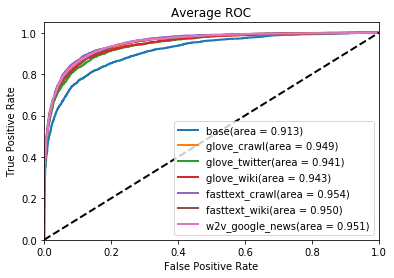

In [16]:
plot_average_ROC_by_embed(Y_test,Y_pred['biGRU'])

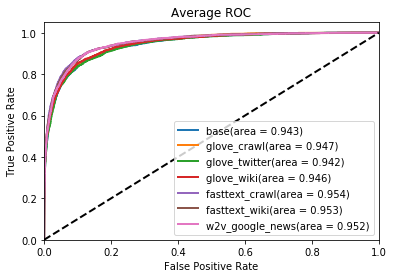

In [17]:
plot_average_ROC_by_embed(Y_test,Y_pred['conv1d'])

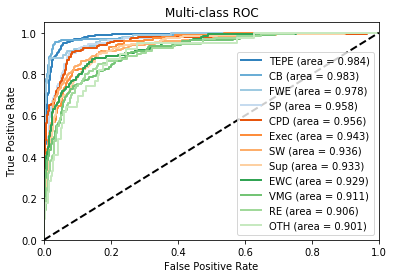

In [19]:
plot_theme_ROC(Y_test,Y_pred['conv1d']['fasttext_crawl'])

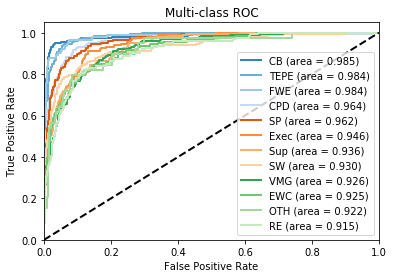

In [30]:
plot_theme_ROC(Y_test,Y_pred['ensemble'], save_fpath='./reports/figures/theme_ROC')

## Adjust the Probability Threshold

In [21]:
predictions = np.round(Y_pred['ensemble']-0.42)

a,b = theme_results(Y_test, predictions)
size = predictions.shape[0]
zero_size = (predictions[predictions.sum(axis = 1) == 0,:].shape[0])
print("Total comments:", size, 
      "\nTotal Predictions:", size - zero_size, 
      "\nPercent Pred non-zero:", round(1 - zero_size/size, 4))
a

Total comments: 1475 
Total Predictions: 728 
Percent Pred non-zero: 0.4936


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,Metric,Value
0,Overall Accuracy,0.3492
1,Hamming Loss,0.0819
2,Micro-average Precision,0.9721
3,Micro-average Recall,0.3384


In [22]:
b

,Label,Y_count,Pred_count,Error,Dummy_Diff,Accuarcy,Precision,Recall
0,CPD,184,69,0.083390,4.135593e-02,0.916610,0.942029,0.353261
1,CB,293,196,0.068475,1.301695e-01,0.931525,0.989796,0.662116
2,EWC,141,24,0.079322,1.627119e-02,0.920678,1.000000,0.170213
3,Exec,149,21,0.088136,1.288136e-02,0.911864,0.952381,0.134228
4,FWE,91,50,0.027797,3.389831e-02,0.972203,1.000000,0.549451
5,SP,145,38,0.075254,2.305085e-02,0.924746,0.947368,0.248276
6,RE,124,7,0.079322,4.745763e-03,0.920678,1.000000,0.056452
7,Sup,216,31,0.126780,1.966102e-02,0.873220,0.967742,0.138889
8,SW,244,71,0.124068,4.135593e-02,0.875932,0.929577,0.270492
9,TEPE,341,214,0.094237,1.369492e-01,0.905763,0.971963,0.609971


In [23]:
non_zero_pred = predictions[predictions.sum(axis = 1) != 0,:]
non_zero_valid = Y_test[predictions.sum(axis = 1) != 0,:]

a,b = theme_results(non_zero_valid, non_zero_pred)
a

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,Metric,Value
0,Overall Accuracy,0.6896
1,Hamming Loss,0.0371
2,Micro-average Precision,0.9721
3,Micro-average Recall,0.7070


In [24]:
b

,Label,Y_count,Pred_count,Error,Dummy_Diff,Accuarcy,Precision,Recall
0,CPD,99,69,0.052198,8.379121e-02,0.947802,0.942029,0.656566
1,CB,222,196,0.041209,2.637363e-01,0.958791,0.989796,0.873874
2,EWC,54,24,0.041209,3.296703e-02,0.958791,1.000000,0.444444
3,Exec,36,21,0.023352,2.609890e-02,0.976648,0.952381,0.555556
4,FWE,65,50,0.020604,6.868132e-02,0.979396,1.000000,0.769231
5,SP,65,38,0.042582,4.670330e-02,0.957418,0.947368,0.553846
6,RE,28,7,0.028846,9.615385e-03,0.971154,1.000000,0.250000
7,Sup,58,31,0.039835,3.983516e-02,0.960165,0.967742,0.517241
8,SW,110,71,0.067308,8.379121e-02,0.932692,0.929577,0.600000
9,TEPE,234,214,0.043956,2.774725e-01,0.956044,0.971963,0.888889


In [25]:
prob_threshold = np.concatenate((np.arange(-0.499999,-0.49,0.0001),
                np.arange(-0.49,0.49,0.01),
                np.arange(0.49,0.49999,0.0001)))

In [26]:
accuracy = []
recall = []
precision = []
prob_adj = []
non_zero_percent = []

for i in prob_threshold:
    
    prob_adj.append(min((0.5 + i),1))
    predictions = np.round(Y_pred['ensemble'] - i)
    
    size = predictions.shape[0]
    zero_size = (predictions[predictions.sum(axis = 1) == 0,:].shape[0])
    
    non_zero_pred = predictions[predictions.sum(axis = 1) != 0,:]
    non_zero_valid = Y_test[predictions.sum(axis = 1) != 0,:]
    
    a,b = theme_results(non_zero_valid, non_zero_pred)
    precision.append(a.Value[2])
    recall.append(a.Value[3])
    
    
    
    accuracy.append(metrics.accuracy_score(non_zero_valid, non_zero_pred))
    non_zero_percent.append(round(1 - zero_size/size, 4))

results_tradeoff = pd.DataFrame({'prob_adj': prob_adj,
                                 'accuracy':accuracy,
                                 'precision': precision,
                                 'recall' : recall,
                                 'non_zero_percent':non_zero_percent})


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


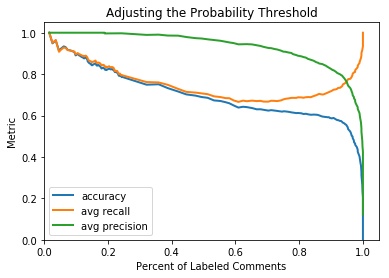

In [29]:
plt.figure()
colors = plt.get_cmap('tab10').colors

plt.plot(results_tradeoff['non_zero_percent'], 
         results_tradeoff['accuracy'], 
         color=colors[0], lw=2,
         label='accuracy')
plt.plot(results_tradeoff['non_zero_percent'], 
         results_tradeoff['recall'], 
         color=colors[1], lw=2,
         label='avg recall')
plt.plot(results_tradeoff['non_zero_percent'], 
         results_tradeoff['precision'], 
         color=colors[2], lw=2,
         label='avg precision')

plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('Percent of Labeled Comments')
plt.ylabel('Metric')
plt.title('Adjusting the Probability Threshold')
plt.legend(loc="lower left")
plt.savefig('./reports/figures/prob_threshold', dpi = 900)

plt.show()